In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_iris.csv")
df = df.sample(frac=1)
df

,x1,x2,x3,x4,name,tipe
94,5.6,2.7,4.2,1.3,Iris-versicolor,1
64,5.6,2.9,3.6,1.3,Iris-versicolor,1
81,5.5,2.4,3.7,1.0,Iris-versicolor,1
66,5.6,3.0,4.5,1.5,Iris-versicolor,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0
31,5.4,3.4,1.5,0.4,Iris-setosa,0
92,5.8,2.6,4.0,1.2,Iris-versicolor,1
27,5.2,3.5,1.5,0.2,Iris-setosa,0
60,5.0,2.0,3.5,1.0,Iris-versicolor,1
21,5.1,3.7,1.5,0.4,Iris-setosa,0


In [0]:
def SumBobot (ciri,bobot,bias):
    sum_bobot = np.dot(ciri, bobot) + bias
    return sum_bobot
  
def Aktivasi (sum_bobot):
    aktivasi = 1/(1+np.exp(-sum_bobot))
    return aktivasi
  
def Prediksi (aktivasi):
    if aktivasi > 0.5:
      return 1 
    else: return 0
  
def Error (aktivasi,tipe):
    return 0.5*((tipe-aktivasi)*(tipe-aktivasi))
  
def Dtheta (ciri,aktivasi,tipe):
    dtheta = []
    for x in range(4):
      dtheta.append(2*ciri[x]*(tipe-aktivasi)*(1-aktivasi)*aktivasi)
    dtheta.append(2*(tipe-aktivasi)*(1-aktivasi)*aktivasi)
    return dtheta
  
def UpdateBobot (dtheta,bobot):
    for x in range(4):
      bobot[x] = bobot[x]+(0.1*dtheta[x])
    return bobot
  
def UpdateBias (dtheta,bias):
    return bias+(0.1*dtheta[4])
  
def Validasi(range1,range2,bobot,bias):
    ciri = df.loc[range1,"x1":"x4"]
    tipe = df.loc[range1,"tipe"]
    aktivasi = 0
    sum_akurasi = 0
    PlotError = []
    Akurasi = []
    for x in range (range1,range2):
      aktivasi = Aktivasi(SumBobot(ciri,bobot,bias))
      #         Penjumlahan Akurasi
      if Prediksi(aktivasi) == tipe:
        sum_akurasi = sum_akurasi + 1
      tipe = df.loc[x+1,"tipe"]
      ciri = df.loc[x+1,"x1":"x4"]
    tipe = df.loc[range2,"tipe"]
    PlotError.append(Error(aktivasi,tipe))
    Akurasi.append(sum_akurasi/20)
    Pair = [PlotError,Akurasi]
    return Pair

def KFold(range1,range2,range3,range4,range5,range6):
    pos = 0
    ciri = df.loc[pos,"x1":"x4"]
    tipe = df.loc[pos,"tipe"]
    bobot = [0.5,0.5,0.5,0.5]
    bias = 0.5
    PlotError_T = []
    Akurasi_T = []
    PlotError_V = []
    Akurasi_V = []
    validate = []
    
    for epoch in range (300):
      sum_akurasi = 0
      aktivasi = 0
      for x in range (range1,range2):
        aktivasi = Aktivasi(SumBobot(ciri,bobot,bias))
        
        #         Penjumlahan Akurasi
        if Prediksi(aktivasi) == tipe:
          sum_akurasi = sum_akurasi + 1
        
        dtheta = Dtheta(ciri,aktivasi,tipe)
        bobot = UpdateBobot(dtheta,bobot)
        bias = UpdateBias(dtheta,bias)
        tipe = df.loc[x+1,"tipe"]
        ciri = df.loc[x+1,"x1":"x4"]
      for x in range (range5,range6):
        aktivasi = Aktivasi(SumBobot(ciri,bobot,bias))
        
        #         Penjumlahan Akurasi
        if Prediksi(aktivasi) == tipe:
          sum_akurasi = sum_akurasi + 1
        
        dtheta = Dtheta(ciri,aktivasi,tipe)
        bobot = UpdateBobot(dtheta,bobot)
        bias = UpdateBias(dtheta,bias)
        tipe = df.loc[x+1,"tipe"]
        ciri = df.loc[x+1,"x1":"x4"]
      tipe = df.loc[range6,"tipe"]
      PlotError_T.append(Error(aktivasi,tipe))
      Akurasi_T.append(sum_akurasi/80)
      validate = Validasi(range3,range4,bobot,bias)
      PlotError_V.append(validate[0])
      Akurasi_V.append(validate[1])
    Pair = [PlotError_T,Akurasi_T,PlotError_V,Akurasi_V]
    return Pair
 

In [0]:
# Range 1,2,5, dan 6 adalah range slicing untuk data training, sedangkan 3 dan 4 adalah data validasi
K1 = KFold(0,39,80,99,40,79)
K2 = KFold(0,59,60,79,80,99)
K3 = KFold(0,39,40,59,60,99)
K4 = KFold(0,19,20,39,40,99)
K5 = KFold(20,59,0,19,60,99)

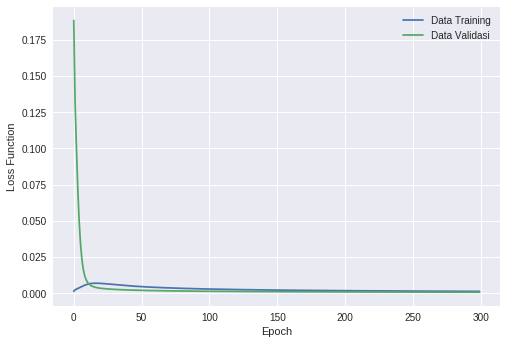

In [122]:
# Hasil Loss Function K-Fold Cross Validation
plot_error_training = np.add(np.add(np.add(np.add(K1[0],K2[0]),K3[0]),K4[0]),K5[0])/5
plot_error_validasi = np.add(np.add(np.add(np.add(K1[2],K2[2]),K3[2]),K4[2]),K5[2])/5
plt.plot(plot_error_training,label="Data Training")
plt.plot(plot_error_validasi,label="Data Validasi")
plt.ylabel('Loss Function')
plt.xlabel('Epoch')
plt.legend()

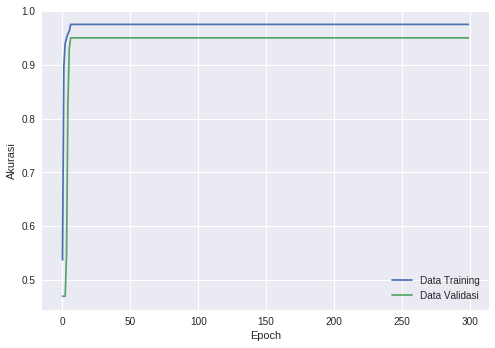

In [123]:
# Hasil Loss Function K-Fold Cross Validation
plot_akurasi_training = np.add(np.add(np.add(np.add(K1[1],K2[1]),K3[1]),K4[1]),K5[1])/5
plot_akurasi_validasi = np.add(np.add(np.add(np.add(K1[3],K2[3]),K3[3]),K4[3]),K5[3])/5
plt.plot(plot_akurasi_training,label="Data Training")
plt.plot(plot_akurasi_validasi,label="Data Validasi")
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend()